In [100]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, LSTM, RNN, Embedding, Bidirectional,SpatialDropout1D, Dropout
from keras.models import Sequential, load_model, save_model
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [38]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\aashutosh
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
dataset = pd.read_csv(r"C:\Users\aashutosh kumar\Music\train_snli.txt",sep = "\t")
dataset.columns = ["Original","Plagarized","Label"]

print(dataset.shape)
dataset.head(4)

(367372, 3)


,Original,Plagarized,Label
0,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",1
1,Children smiling and waving at camera,There are children present,1
2,Children smiling and waving at camera,The kids are frowning,0
3,A boy is jumping on skateboard in the middle o...,The boy skates down the sidewalk.,0


In [10]:
dataset.isnull().sum()

Original      0
Plagarized    4
Label         0
dtype: int64

In [11]:
dataset = dataset.dropna()

In [15]:
dataset.duplicated().sum()

454

In [16]:
dataset = dataset.drop_duplicates()
dataset.duplicated().sum()

0

Text(0.5, 1.0, 'Count-plot of Labels')

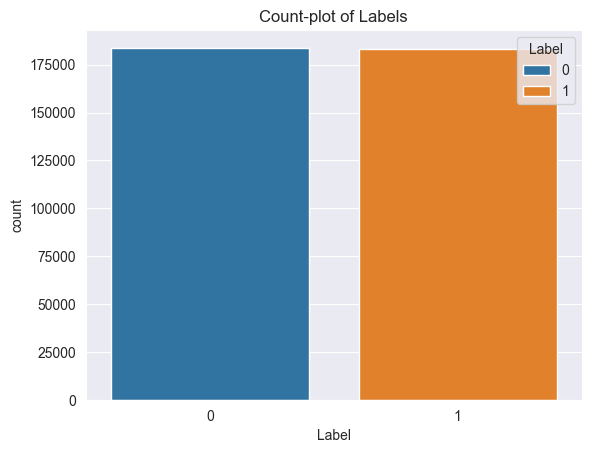

In [18]:
sns.set_style("darkgrid")
sns.countplot(data = dataset, x = "Label", hue = "Label")
plt.title("Count-plot of Labels")

(-0.5, 399.5, 199.5, -0.5)

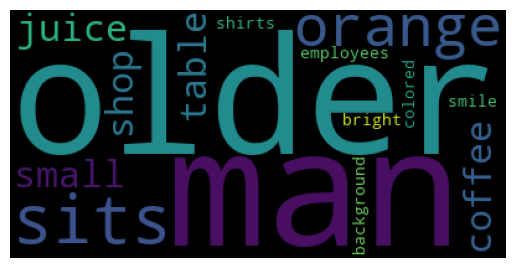

In [34]:
text = dataset.Original[5]
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

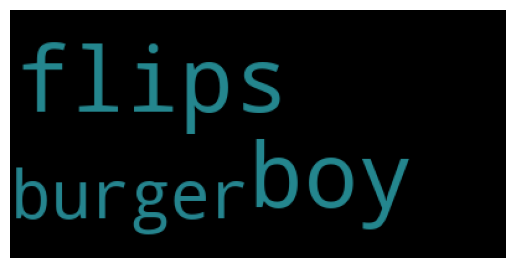

In [35]:
text = dataset.Plagarized[5]
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis("off")

In [45]:
def preprocess(text):
    if isinstance(text, str):
        text = text.lower()
        text = text.translate(str.maketrans("", "", string.punctuation))
        stopwords_set = set(stopwords.words("english"))
        stemmer = PorterStemmer()

        text = " ".join(stemmer.stem(word) for word in text.split() if word not in stopwords_set)

        return text


In [50]:
dataset["Original"] = dataset["Original"].apply(preprocess)
dataset["Plagarized"] = dataset["Plagarized"].apply(preprocess)

In [51]:
dataset.head(4)

,Original,Plagarized,Label
0,person hors jump broken airplan,person outdoor hors,1
1,children smile wave camera,children present,1
2,children smile wave camera,kid frown,0
3,boy jump skateboard middl red bridg,boy skate sidewalk,0


In [54]:
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(dataset["Original"] + " " + dataset["Plagarized"])

In [55]:
Y = dataset["Label"]

In [57]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((293531, 20159), (73383, 20159), (293531,), (73383,))

Training Accuracy: 0.997489191942248
Testing Accuracy: 0.6974912445661802
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.66      0.68     36674
           1       0.68      0.74      0.71     36709

    accuracy                           0.70     73383
   macro avg       0.70      0.70      0.70     73383
weighted avg       0.70      0.70      0.70     73383

Confusion Matrix


<Axes: >

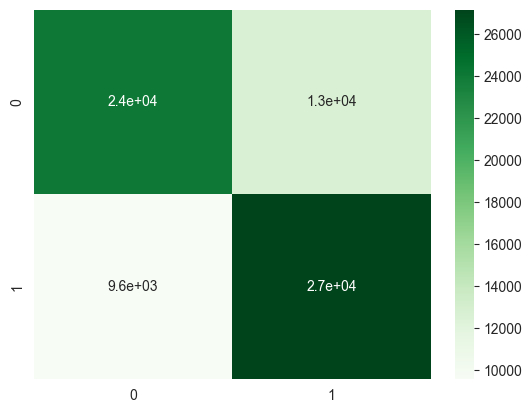

In [60]:
model = RandomForestClassifier(n_estimators=30)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
test_acc = model.score(x_test,y_test)
train_acc = model.score(x_train,y_train)
classification_rep = classification_report(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

print("Classification Report:")
print(classification_rep)
print("Confusion Matrix")
sns.heatmap(data = cm, annot = True,cmap = "Greens")

Training Accuracy: 0.5727844759156614
Testing Accuracy: 0.5724622869056866
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.21      0.33     36674
           1       0.54      0.93      0.69     36709

    accuracy                           0.57     73383
   macro avg       0.65      0.57      0.51     73383
weighted avg       0.65      0.57      0.51     73383

Confusion Matrix


<Axes: >

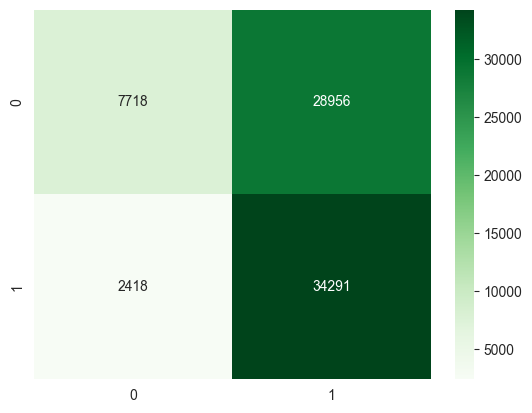

In [63]:
model = DecisionTreeClassifier(max_depth = 5)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
test_acc = model.score(x_test,y_test)
train_acc = model.score(x_train,y_train)
classification_rep = classification_report(y_test, y_pred)

cm1 = confusion_matrix(y_test, y_pred)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

print("Classification Report:")
print(classification_rep)
print("Confusion Matrix")
sns.heatmap(data = cm1, annot = True,cmap = "Greens", fmt = "d")

Training Accuracy: 0.6843876796658616
Testing Accuracy: 0.6498644100132184
F1 Score:  0.6702600035933369
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.59      0.63     36674
           1       0.63      0.71      0.67     36709

    accuracy                           0.65     73383
   macro avg       0.65      0.65      0.65     73383
weighted avg       0.65      0.65      0.65     73383

Confusion Matrix


<Axes: >

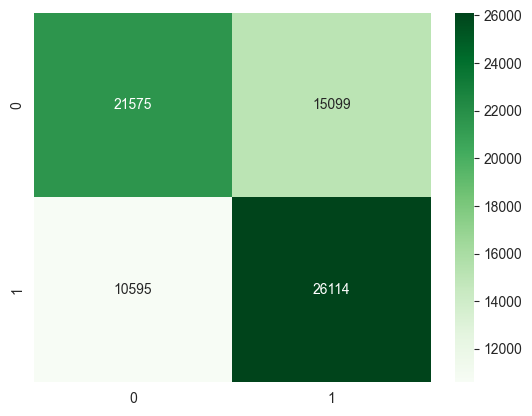

In [68]:
model = MultinomialNB()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
test_acc = model.score(x_test,y_test)
train_acc = model.score(x_train,y_train)
classification_rep = classification_report(y_test, y_pred)

cm1 = confusion_matrix(y_test, y_pred)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print("F1 Score: ",f1_score(y_test, y_pred))
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix")
sns.heatmap(data = cm1, annot = True,cmap = "Greens", fmt = "d")

In [70]:
import pickle

pickle.dump(model,open("ML_model.pkl",'wb'))
pickle.dump(tfidf_vectorizer, open('tfidf_vectorizer.pkl','wb'))

**USING LSTM**

In [71]:
dataset.head(3)

,Original,Plagarized,Label
0,person hors jump broken airplan,person outdoor hors,1
1,children smile wave camera,children present,1
2,children smile wave camera,kid frown,0


In [75]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(dataset["Original"]+" "+dataset["Plagarized"])
X2 = tokenizer.texts_to_sequences(dataset["Original"]+" "+dataset["Plagarized"])

In [77]:
X2 = pad_sequences(X2,padding = "post")

In [80]:
X2[0]

array([  25,  110,   36, 1055,  600,   25,   67,  110,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0])

In [81]:
Y2 = dataset["Label"]

In [84]:
x2_train, x2_test, y2_train, y2_test = train_test_split(X2,Y2,test_size=0.2)
x2_train.shape, x2_test.shape, y2_train.shape, y2_test.shape

((293531, 65), (73383, 65), (293531,), (73383,))

In [85]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

20186

In [102]:
classifier = Sequential()

classifier.add(Embedding(input_dim = vocab_size, output_dim = 100, input_length = X2.shape[1]))
classifier.add(SpatialDropout1D(0.3))

classifier.add(Bidirectional(LSTM(units=128, return_sequences = True)))
classifier.add(Bidirectional(LSTM(units=64)))

classifier.add(Dense(units = 64, activation = "relu"))
classifier.add(Dropout(0.3))
classifier.add(Dense(units = 32, activation = "relu"))
classifier.add(Dense(units = 1, activation = "sigmoid"))

classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [103]:
classifier.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 65, 100)           2018600   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 65, 100)          0         
 lDropout1D)                                                     
                                                                 
 bidirectional_2 (Bidirectio  (None, 65, 256)          234496    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                      

In [104]:
h = classifier.fit(x2_train, y2_train, batch_size=32, epochs=10, validation_data=[x2_test, y2_test])

Epoch 1/10
9173/9173 [==============================] - 612s 66ms/step - loss: 0.4872 - accuracy: 0.7514 - val_loss: 0.4273 - val_accuracy: 0.8031
Epoch 2/10
9173/9173 [==============================] - 616s 67ms/step - loss: 0.3824 - accuracy: 0.8280 - val_loss: 0.3681 - val_accuracy: 0.8391
Epoch 3/10
9173/9173 [==============================] - 445s 49ms/step - loss: 0.3262 - accuracy: 0.8607 - val_loss: 0.3401 - val_accuracy: 0.8565
Epoch 4/10
  17/9173 [..............................] - ETA: 5:45 - loss: 0.2765 - accuracy: 0.8897

KeyboardInterrupt: 

In [106]:
y_pred2 = classifier.predict(x2_test)
# cm1 = confusion_matrix(y2_test, y_pred2)

2294/2294 [==============================] - 38s 17ms/step


In [112]:
for i in range(len(y_pred2)):  # Use the length of y_pred2 for the range
    if y_pred2[i] >= 0.5:
        y_pred2[i] = 1
    else:
        y_pred2[i] = 0


In [116]:
cm1 = confusion_matrix(y2_test, y_pred2)
f1_score(y2_test, y_pred2)

0.8608100248506318

In [117]:
save_model(classifier,"LSTM_model.h5")